# Lập trình thống kê Python nâng cao

## Bài 2: ANOVA đơn biến sử dụng OOP

### BS. Lê Ngọc Khả Nhi

# Ôn lý thuyết

Trước hết, chúng ta ôn lại lý thuyết về ANOVA đơn biến:

Bài toán thống kê gồm 2 biến:

+ kết quả Y là một biến định lượng, liên tục

+ yếu tố phân nhóm (X) là một biến phân loại định tính

Câu hỏi nghiên cứu có thể được phát biểu theo 2 cách:

1) So sánh giá trị Y giữa k phân nhóm X1, X2,...Xk (đây là cách hiểu thông dụng ; có hàm ý so sánh)

2) Khảo sát tác động của X lên sự thay đổi của Y. Đây là cách phát biểu theo trường phái mô hình hồi quy

ở trường đại học các sinh viên Y khoa thường được dạy nhìn vấn đề theo cách thứ nhất (so sánh giá trị trung bình Yj giữa các phân nhóm Xj), do đó hầu hết bác sĩ và sinh viên thường ngộ nhận ANOVA là 1 kiểm định thống kê, giống như Student-t test.

Khi chúng ta tiếp cận theo hướng mô hình, ta sẽ nhận ra bài toán ANOVA chính là một mô hình hồi quy tuyến tính có dạng Y ~ X, và thay vì dùng thuật ngữ So sánh giữa 4 phân nhóm, ta sẽ nghĩ về 4 bậc Hiệu ứng mà yếu tố X đã gây ra cho kết quả Y.

Nhi khuyến khích các bạn suy nghĩ theo cách thứ hai (mô hình GLM), bởi vì nó cho phép các bạn quan sát thế giới sinh lý bệnh như những mô hình, bạn có thể nhìn ra bản chất của hiện tượng và tương tác giữa các yếu tố, hình dung về thiết kế phân nhóm ngay từ khi việc phân nhóm chưa được thực hiện.

Một quy trình ANOVA nhằm trả lời 2 câu hỏi :

Câu hỏi 1: X có thật sự gây ra hiệu ứng ý nghĩa làm thay đổi Y hay không ? (Nói cách khác : Mô hình tuyến tính Y ~ X có cho phép giải thích được phần lớn sai biệt của Y hay không ?), hiệu ứng của X lớn đến mức nào ?

Câu hỏi thứ nhất này được giải quyết bằng F test

Đầu tiên ta dựng một mô hình tuyến tính M có dạng Y ~ X (chúng ta sẽ tìm hiểu rõ hơn về nội dung hàm f trong đoạn sau). Áp dụng model M này, ta có thể ước lượng giá trị trung bình Yj của Y tại mỗi bậc j của yếu tố X. Yj được giả định có phân phối chuẩn (Muj, sigmaj), trong đó Muj là giá trị trung bình dự báo, còn sigmaj cho biết sai biệt mang tính nội tại (trong từng phân nhóm) và ngẫu nhiên so với giá trị có thực quan sát được (có thể xem như residual error của model M hay residual sum of squares = SSR).

SSR = Residual sum of squares

$SSR=\sum_{i=1}^{n}(y_i-\hat{y}_i)^2$

Ta lại có thể tính được khoảng cách sai biệt giữa Muj và giá trị trung bình của Y cho toàn quần thể (tất cả phân nhóm gộp lại), đây là phần sai biệt do sự phân nhóm gây ra (hay phần biến thiên của Y mà mô hình M có thể giải thích được):

SSM = Model sum of squares

$SSM=\sum_{i=1}^{n}(\hat{y}_i-\bar{y})^2$

Từ đó ta có:

Trung bình bình phương mô hình: Mean model sum of squares: MSM

$MSM=\frac{SSR}{k-1}$

Với k = số bậc của yếu tố X

Trung bình bình phương nội tại ngẫu nhiên : Mean residual sum of squares

$MSR=\frac{SSE}{n-k}$

Tỉ số F được xác định như sau:

$F=\frac{MSM}{MSR}$

Tỉ số F có thể được định nghĩa theo nhiều cách, thí dụ : F= tỉ số giữa hiệu ứng chính giữa các phân nhóm Xj và hiệu ứng nội tại trong từng phân nhóm Xj, hoặc F=tỉ số giữa phương sai do yếu tố X và phương sai do ngẫu nhiên, hoặc : F = tỉ số giữa phần phương sai mà mô hình cho phép giải thích và phần phương sai còn lại mà mô hình không thể giải thích.

Kiểm định F được Giáo sư Ronald A. Fisher (1890-1962), một nhà di truyền và thống kê học người Anh thiết kế ra năm 1920. Bản chất của F test là một phản nghiệm với lý luận như sau:

Nếu X thực sự gây hiệu ứng quan trọng đối với Y (tức là gây ra thay đổi lớn hơn sự biến thiên ngẫu nhiên của chính Y), một mô hình M ước lượng Y theo X hẳn phải rất phù hợp với dữ liệu, các điểm giá trị Yij sẽ nằm rất gần đường thẳng hồi quy M=f(X). M sẽ cho phép giải thích hầu hết phương sai của Y và chỉ để lại phần sai số dư nhỏ như vậy, như vậy MSM chắc chắn là lớn hơn so với MSR.

Nếu ta dùng 1 giá trị F đại diện cho tỉ lệ MSM/MSR, hiệu ứng của X càng quan trọng thì F càng lớn.

Bước tiếp theo của phản nghiệm (như mọi Null hypothesis testing khác), ta sẽ dùng F đại diện cho hiệu ứng của X: Ta muốn chứng minh là F đủ lớn để có thể gọi là có ý nghĩa.

Giả thuyết 0 do đó sẽ là: Có 1 giá trị F’ còn lớn hơn F nữa ! (H0: F’ > F) Giả thuyết H1 sẽ là : F’ không lớn hơn F.

Xác suất tìm ra F’ được xác định từ hàm pdf của một phân phối “F”, với 2 tham số độ tự do tương ứng với (k-1) : số phân nhóm hay bậc của X trừ 1, và (N-k) với N=cỡ mẫu. Mật độ xác suất (giá trị p) so với ngưỡng ý nghĩa thống kê được chọn, thí dụ alpha = 0.05 sẽ cho biết khả năng H0 đúng là thấp hơn hay cao hơn 0.05.

Nếu p<0.05 thì ta có thể loại bỏ giả thuyết H0. Kết quả này tương đương với việc khẳng định: F đủ lớn để cho phép suy diễn rằng hiệu ứng của X có ý nghĩa thống kê.

Ngoài F test, ta còn có thể tính những Effect-sizes (kích thước hiệu ứng), thí dụ: Etasquared và Omegasquared

$\eta ^{2} = \frac{SSM}{SST}$

$\omega ^{2} = \frac{SSM-dfmodel*MSR}{SST+MSR}$

Giá trị omegaSqr hay Etasqr thường được diễn giải ở 3 mức: hiệu ứng nhỏ nếu < 0.05 trung bình : từ 0.01-0.05 và lớn nếu > 0.15

Câu hỏi 2) Sự khác biệt giữa các phân nhóm với nhau là bao nhiêu ? Có ý nghĩa hay không ? (Mục tiêu so sánh bắt cặp tuần tự giữa các phân nhóm, hay định vị sự khác biệt giữa các thứ bậc của X).

Câu hỏi thứ 2 này có hàm ý so sánh trung bình bắt cặp tuần tự giữa các phân nhóm. Ta thường dùng Post-hoc test khi không có giả thuyết nào cụ thể; phổ biến nhất là Bonferroni hay Tukey

# Phân tích phương sai đơn biến sử dụng OOP

Trong bài này Nhi sẽ thực hiện 1 công cụ phân tích phương sai đơn biến, dựa trên package thống kê statsmodel. Công cụ được thiết kế theo phong cách OOP (Object oriented programming), lập trình hướng đối tượng.

Mục tiêu là thiết kế 1 class tên là one_way_anova. Mỗi lần sử dụng class này, ta sẽ tạo ra 1 object tương ứng với 1 phân tích anova. Object này chuyên biệt cho mỗi phân tích. Bên trong object này chứa dataframe dữ liệu, và hỗ trợ 6 methods của 1 quy trình phân tích:

method descriptive làm thống kê mô tả Y theo từng phân nhóm X

method boxplot vẽ biểu đồ boxplot khảo sát phân phối Y giữa các phân nhóm X

method anova dựng bảng ANOVA

method posthoc_tukey và posthoc_bonferoni thực hiện post hoc test theo 2 phương pháp khác nhau

In [17]:
class one_way_anova:
    
    '''
    Class dữ liệu thực hiện phân tích phương sai 1 yếu tố
    
    Cú pháp: one_way_anova(data, formula)
    
    Arguments:
    data = tên object pandas dataframe
    formula = công thức 'Tên biến kết quả ~ Tên biến phân nhóm'
    Chú ý: 2 khoảng cách giữa '~' và 2 tên biến
    '''
    
    def __init__(self, data,formula):
        self.data = data
        self.formula = formula
        self.y = self.data[self.formula.split(' ~ ')[0]]
        self.x = self.data[self.formula.split(' ~ ')[1]]
    
    def descriptive(self, percentiles = [0.05, 0.5, 0.95]):
        
        '''
        Method thống kê mô tả
        
        cú pháp descriptive(percentiles)
        
        percentiles là list, thí dụ [0.05, 0.5, 0.95]
        '''
        return self.data.groupby([self.formula.split(' ~ ')[1]])[self.formula.split(' ~ ')[0]].describe(percentiles = percentiles)
    
    def boxplot(self):
        
        '''
        Method vẽ biểu đồ boxplot sử dụng seaborn
        '''
        
        import seaborn as sns
        sns.boxplot(x = self.formula.split(' ~ ')[0], 
                       y = self.formula.split(' ~ ')[1], 
                       data= self.data)
    
    def anova(self):
        
        '''
        Method tạo bảng ANOVA
        
        Kết quả xuất ra là bảng bao gồm:
        
        + Các trị số thống kê
        + Kết quả F test
        + Effect_size: Omega squared và Eta squared
        '''
        
        import statsmodels.api as sm
        from statsmodels.formula.api import ols
        
        ols_mod = ols(self.formula,
                  data= self.data).fit()
                
        aov = sm.stats.anova_lm(ols_mod, typ=2)
        
        aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
        aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
        aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
        cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
        
        aov = aov[cols]
        
        return aov

    def post_hoc_tukey(self):
        
        '''
        Method hậu kiểm, so sánh bắt cặp tuần tự 
        bằng kiểm định t theo Tukey
        '''
        
        from statsmodels.stats.multicomp import MultiComparison
        
        mod = MultiComparison(self.y, self.x)
        res = mod.tukeyhsd()
        tukey = res.summary()
        
        return tukey
    
    def post_hoc_bonferoni(self):
        
        '''
        Method hậu kiểm - so sánh bắt cặp tuần tự, 
        sử dụng t_test và hiệu chỉnh theo Bonferoni
        '''
        import scipy.stats as stats
        import numpy as np
        from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
        
        mod = MultiComparison(self.y, self.x)
        res2 = pairwise_tukeyhsd(self.y, self.x)
        
        res_2df = pd.DataFrame(res2.summary()[1:])

        studentized_mean = res2.meandiffs
        studentized_variance = res2.variance
        
        t_stat = (studentized_mean / studentized_variance) / np.sqrt(2)
        dof = len(self.data) - len(mod.groupsunique)
        my_pvalues = stats.t.sf(np.abs(t_stat), dof) * 2  # two-sided
        
        from statsmodels.stats.multitest import multipletests
        res_b = multipletests(my_pvalues, method="b")
        
        bonferoni = pd.DataFrame({'group1': res_2df[0],
                                       'group2': res_2df[1],
                                       'p_value': res_b[1],
                                       'H0_reject': res_b[0]
                                      })
        
        print('Pair_wise t test with Bonferoni adj.')
        
        return bonferoni

In [2]:
help(one_way_anova)

Help on class one_way_anova in module __main__:

class one_way_anova(builtins.object)
 |  one_way_anova(data, formula)
 |  
 |  Class dữ liệu thực hiện phân tích phương sai 1 yếu tố
 |  
 |  Cú pháp: one_way_anova(data, formula)
 |  
 |  Arguments:
 |  data = tên object pandas dataframe
 |  formula = công thức 'Tên biến kết quả ~ Tên biến phân nhóm'
 |  Chú ý: 2 khoảng cách giữa '~' và 2 tên biến
 |  
 |  Methods defined here:
 |  
 |  __init__(self, data, formula)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  anova(self)
 |      Method tạo bảng ANOVA
 |      
 |      Kết quả xuất ra là bảng bao gồm:
 |      
 |      + Các trị số thống kê
 |      + Kết quả F test
 |      + Effect_size: Omega squared và Eta squared
 |  
 |  boxplot(self)
 |      Method vẽ biểu đồ boxplot sử dụng seaborn
 |  
 |  descriptive(self, percentiles=[0.05, 0.5, 0.95])
 |      Method thống kê mô tả
 |      
 |      cú pháp descriptive(percentiles)
 |      
 |      percentiles là

In [3]:
dir(one_way_anova)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'anova',
 'boxplot',
 'descriptive',
 'post_hoc_bonferoni',
 'post_hoc_tukey']

# Sử dụng công cụ oneway_anova

## Dataset iris

In [18]:
import pandas as pd

iris = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv', 
                   index_col = 0)

iris= data.set_axis(['SepalLength','SepalWidth','PetalLength','PetalWidth','Species'], axis=1, inplace=False)

iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [19]:
test_1 = one_way_anova(data = iris, 
                      formula = 'SepalLength ~ Species')

In [20]:
test_1.formula

'SepalLength ~ Species'

In [21]:
test_1.x

1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
         ...    
146    virginica
147    virginica
148    virginica
149    virginica
150    virginica
Name: Species, Length: 150, dtype: object

In [22]:
test_1.y

1      5.1
2      4.9
3      4.7
4      4.6
5      5.0
      ... 
146    6.7
147    6.3
148    6.5
149    6.2
150    5.9
Name: SepalLength, Length: 150, dtype: float64

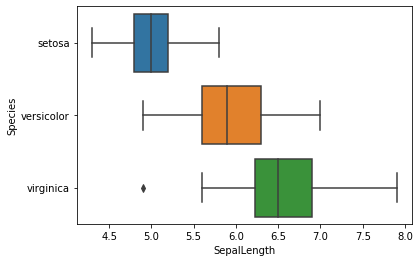

In [23]:
test_1.boxplot()

In [24]:
test_1.descriptive()

,count,mean,std,min,5%,50%,95%,max
Species,,,,,,,,
setosa,50.0,5.006,0.352490,4.3,4.400,5.0,5.610,5.8
versicolor,50.0,5.936,0.516171,4.9,5.045,5.9,6.755,7.0
virginica,50.0,6.588,0.635880,4.9,5.745,6.5,7.700,7.9


In [25]:
test_1.descriptive().T

Species,setosa,versicolor,virginica
count,50.00000,50.000000,50.00000
mean,5.00600,5.936000,6.58800
std,0.35249,0.516171,0.63588
min,4.30000,4.900000,4.90000
5%,4.40000,5.045000,5.74500
50%,5.00000,5.900000,6.50000
95%,5.61000,6.755000,7.70000
max,5.80000,7.000000,7.90000


In [26]:
test_1.anova()

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
Species,63.212133,2.0,31.606067,119.264502,1.669669e-31,0.618706,0.611931
Residual,38.956200,147.0,0.265008,NaN,NaN,NaN,NaN


In [27]:
test_1.post_hoc_tukey()

group1,group2,meandiff,p-adj,lower,upper,reject
setosa,versicolor,0.93,0.001,0.6862,1.1738,True
setosa,virginica,1.582,0.001,1.3382,1.8258,True
versicolor,virginica,0.652,0.001,0.4082,0.8958,True


In [28]:
test_1.post_hoc_bonferoni()

Pair_wise t test with Bonferoni adj.


,group1,group2,p_value,H0_reject
0,setosa,versicolor,0.042632,True
1,setosa,virginica,0.000127,True
2,versicolor,virginica,0.252016,False


## Một dataset khác: 

In [29]:
lung_morphometry = pd.read_csv("https://raw.githubusercontent.com/kinokoberuji/R-Tutorials/master/aerodim.csv",sep=";")

lung_morphometry .head()

,Poids,Taille,BMI,Age,Sexe,Hb,Diagnostic,GST,Volume,Surface,DmCO,Thickness,DLCO,FVC
0,53,165,19.467401,54,F,13.4,E,1.284048,7.0080,19.647869,450.315872,0.142701,6.767,2.30
1,92,170,31.833910,75,H,17.1,E,1.291861,3.7750,10.519710,72.271882,0.476060,19.146,3.04
2,69,186,19.944502,41,H,14.6,E,1.211214,7.7695,23.092705,372.142895,0.202952,29.047,5.72
3,60,160,23.437500,75,F,13.5,E,1.439790,4.3295,10.825326,89.206177,0.396893,14.943,2.57
4,72,172,24.337480,60,H,14.6,E,1.388885,5.5610,14.414152,180.833030,0.260699,13.888,4.36


In [30]:
test_2 = one_way_anova(lung_morphometry, 'Thickness ~ Diagnostic')

In [34]:
test_2.descriptive(percentiles = [0.05,0.25,0.5,0.75,0.95]).T

Diagnostic,E,F,N
count,14.000000,9.000000,15.000000
mean,0.307497,0.922959,0.590980
std,0.115139,0.143293,0.095471
min,0.142701,0.712176,0.409640
5%,0.163914,0.723691,0.463875
25%,0.206489,0.831632,0.529445
50%,0.289362,0.990151,0.580132
75%,0.393588,1.024771,0.649025
95%,0.479844,1.079562,0.746538
max,0.486870,1.100068,0.772808


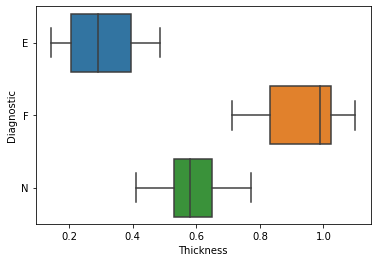

In [38]:
test_2.boxplot()

In [35]:
test_2.anova()

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
Diagnostic,2.09164,2.0,1.045820,78.851663,1.085499e-13,0.818374,0.803824
Residual,0.46421,35.0,0.013263,NaN,NaN,NaN,NaN


In [36]:
test_2.post_hoc_bonferoni()

Pair_wise t test with Bonferoni adj.


,group1,group2,p_value,H0_reject
0,E,F,2.124029e-27,True
1,E,N,1.963201e-16,True
2,F,N,1.457576e-18,True


In [37]:
test_2.post_hoc_tukey()

group1,group2,meandiff,p-adj,lower,upper,reject
E,F,0.6155,0.001,0.4951,0.7359,True
E,N,0.2835,0.001,0.1788,0.3882,True
F,N,-0.332,0.001,-0.4508,-0.2132,True


# Bàn luận:

OOP (Class và method) cho phép tạo ra một thiết kế giản dị và hiệu quả cho quy trình phân tích ANOVA trong Python. Ta có thể tạo hàng loạt object chuyên biệt cho việc kiểm định cho các cặp X,Y khác nhau. Các bước thống kê mô tả, F test và posthoc test được đóng gói gọn gàng thành method trong mỗi object, và rất dễ sử dụng; ta không cần phải gọi các function từ stats model một cách thủ công.

Bài thực hành đến đây là hết hẹn gặp các bạn lần sau.